PROJET N°7-1 : EXPLORATION
==========================

***Implémentez un modèle de scoring***

**Auteur:** *Jean EMIDIO*

**But**

- Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

- L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

**Mission 1**

- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Analyser les features qui contribuent le plus au modèle, d’une manière générale (feature importance globale) et au niveau d’un client (feature importance locale), afin, dans un soucis de transparence, de permettre à un chargé d’études de mieux comprendre le score attribué par le modèle.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API et réaliser une interface de test de cette API.
- Mettre en œuvre une approche globale MLOps de bout en bout, du tracking des expérimentations à l’analyse en production du data drift.

**Mission 2**

Afin de pouvoir faire évoluer régulièrement le modèle, je souhaite tester la mise en œuvre une démarche de type MLOps d’automatisation et d’industrialisation de la gestion du cycle de vie du modèle. 

Vous trouverez en pièce jointe la liste d’outils à utiliser pour créer une plateforme MLOps qui s’appuie sur des outils Open Source. 

Je souhaite que vous puissiez mettre en oeuvre au minimum les étapes orientées MLOps suivantes : 

- Dans le notebook d’entraînement des modèles, générer à l’aide de MLFlow un tracking d'expérimentations
- Lancer l’interface web 'UI MLFlow" d'affichage des résultats du tracking
- Réaliser avec MLFlow un stockage centralisé des modèles dans un “model registry”
- Tester le serving MLFlow
- Gérer le code avec le logiciel de version Git
- Partager le code sur Github pour assurer une intégration continue
- Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions
 
J’ai également rassemblé des conseils pour vous aider à vous lancer dans ce projet !

Concernant l’élaboration du modèle soyez vigilant sur deux points spécifiques au contexte métier : 
- Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, avec une méthode au choix
- Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge)
Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP
Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum)
En parallèle, maintenez pour comparaison et contrôle des mesures plus techniques, telles que l’AUC et l’accuracy 

D’autre part je souhaite que vous mettiez en œuvre une démarche d’élaboration des modèles avec Cross-Validation et optimisation des hyperparamètres, via GridsearchCV ou équivalent.

Un dernier conseil : si vous obtenez des scores supérieurs au 1er du challenge Kaggle (AUC > 0.82), posez-vous la question si vous n’avez pas de l’overfitting dans votre modèle !

Vous exposerez votre modèle de prédiction sous forme d’une API qui permet de calculer la probabilité de défaut du client, ainsi que sa classe (accepté ou refusé) en fonction du seuil optimisé d’un point de vue métier.

Le déploiement de l’API sera réalisée sur une plateforme Cloud, de préférence une solution gratuite.

Je vous propose d’utiliser un Notebook ou une application Streamlit pour réaliser en local  l’interface de test de l’API.

**Outils Open Source pour élaborer une plateforme MLOps**

- MLFlow pour la gestion “d’expériences” et leur tracking lors de la phase d’entraînement des modèles, ainsi que la visualisation des résultats avec MLFlow UI
- MLFlow pour le stockage centralisé des modèles dans un “model registry” et le serving
- Git, logiciel de version de code, pour suivre les modifications du code final de l’API de prédiction à déployer
- Github pour stocker et partager sur le cloud le code de l’API, alimenté par un “push” Git et ainsi assurer une intégration continue
- Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Pytest (ou Unittest) pour concevoir les tests unitaires et les exécuter de manière automatisée lors du build réalisé par Github

**Objectifs pédagogiques**

- Définir et mettre en œuvre un pipeline d’entraînement des modèles
- Définir la stratégie d’élaboration d’un modèle d’apprentissage supervisé
- Évaluer les performances des modèles d’apprentissage supervisé
- Mettre en œuvre un logiciel de version de code
- Suivre la performance d’un modèle en production et en assurer la maintenance
- Concevoir un déploiement continu d'un moteur d’inférence sur une plateforme Cloud

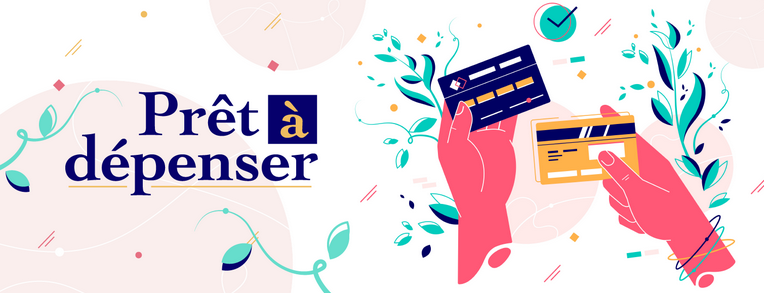

**Table of contents**<a id='toc0_'></a>    
- [Les datas](#toc1_)    
  - [Import](#toc1_1_)    
  - [Initialisations](#toc1_2_)    
  - [Fonctions](#toc1_3_)    
  - [Dataset](#toc1_4_)    
- [Exploration des données](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Les datas](#toc0_)

## <a id='toc1_1_'></a>[Import](#toc0_)

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_2_'></a>[Initialisations](#toc0_)

In [2]:
# Initialisations :
SEED = 15 # Ici on définit RANDOM_SEED = constant seulement pour la reproductibilité
warnings.filterwarnings('ignore')

# Paramètres d'affichage :
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Formats :
sns.set_style("whitegrid")
font_title = {
  "family": "serif",
  "color":  "black",
  "weight": "bold",
  "size": 20
}

## <a id='toc1_3_'></a>[Fonctions](#toc0_)

In [3]:
import fonctions_python as fc
import importlib
importlib.reload(fc)

<module 'fonctions_python' from 'c:\\Users\\jme1401\\Desktop\\OCR\\7-Implémentez un modèle de scoring\\Datas\\fonctions_python.py'>

## <a id='toc1_4_'></a>[Dataset](#toc0_)

In [4]:
path_datas_init = "./datas/datas_init/"
path_datas_save = "./datas/datas_save/"
path_models = "./models/"

In [5]:
df_datas_train = pd.read_csv(path_datas_save + 'df_datas_train_cleaned.csv').set_index('SK_ID_CURR')
df_datas_test = pd.read_csv(path_datas_save + 'df_datas_test_cleaned.csv').set_index('SK_ID_CURR')

# <a id='toc2_'></a>[Exploration des données](#toc0_)

In [6]:
df_datas_train.describe()

TARGET    CODE_GENDER   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307507.00000  307507.000000  307507.000000    307507.000000   
mean        0.08073       0.658352       0.340106         0.306331   
std         0.27242       0.474263       0.473745         0.460970   
min         0.00000       0.000000       0.000000         0.000000   
25%         0.00000       0.000000       0.000000         0.000000   
50%         0.00000       1.000000       0.000000         0.000000   
75%         0.00000       1.000000       1.000000         1.000000   
max         1.00000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307507.000000      3.075070e+05  3.075070e+05  307507.000000   
mean        0.417047      1.687977e+05  5.990286e+05   27108.580714   
std         0.722119      2.371246e+05  4.024926e+05   14493.522125   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075070e+05               307507.000000  307507.000000   
mean      5.383178e+05                    0.020868      43.937061   
std       3.692898e+05                    0.013831      11.956116   
min       4.050000e+04                    0.000290      20.517808   
25%       2.385000e+05                    0.010006      34.008219   
50%       4.500000e+05                    0.018850      43.150685   
75%       6.795000e+05                    0.028663      53.923288   
max       4.050000e+06                    0.072508      69.120548   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307507.000000      307507.000000    307507.000000  307507.000000   
mean     2251.582211        4986.131376      2994.201670       0.999997   
std      2136.160141        3522.883030      1509.454566       0.001803   
min        -0.000000          -0.000000         0.000000       0.000000   
25%       933.000000        2010.000000      1720.000000       1.000000   
50%      1648.000000        4504.000000      3254.000000       1.000000   
75%      2760.000000        7479.500000      4299.000000       1.000000   
max     17912.000000       24672.000000      7197.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307507.000000    307507.000000     307507.000000  307507.000000   
mean         0.819887         0.199358          0.998133       0.281057   
std          0.384282         0.399518          0.043164       0.449516   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307507.000000    307507.000000         307507.000000   
mean        0.056721         2.152657              2.052461   
std         0.231308         0.910677              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307507.000000            307507.000000   
mean                      2.031518                12.063394   
std        

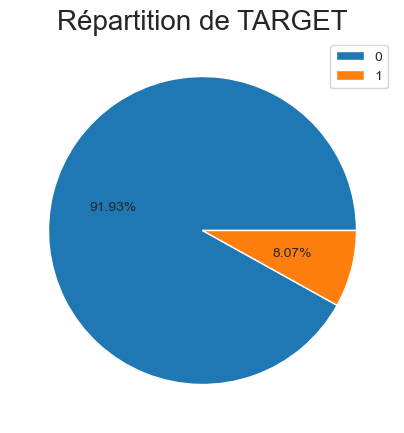

In [7]:
fc.pie_plot(df_datas_train,['TARGET'])

Pour notre target, 1 correspond aux clients en difficulté de paiement (il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon), 0 correspond aux autres clients (qui n'ont donc pas de difficultés de paiement).

On constate que notre target est déséquilibrée. En effet, notre dataframe comporte beaucoup plus de clients ne possédant pas de difficultés de paiement (91.93%).

Nous verrons par la suite comment nous pouvons rééquilibrer notre target en vue d'une modélisation.

In [8]:
df_datas_train_init = pd.read_csv(path_datas_init + 'application_train.csv')
df_datas_train_init.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
col_cat = list(df_datas_train_init.select_dtypes(['object']).columns)
col_cat.append('TARGET')
fc.bar_plot_stacked(df_datas_train_init, col_cat, n_cols=2, fig=(40, 140))

On constate des modalités majoritaires pour la plupart des features. 

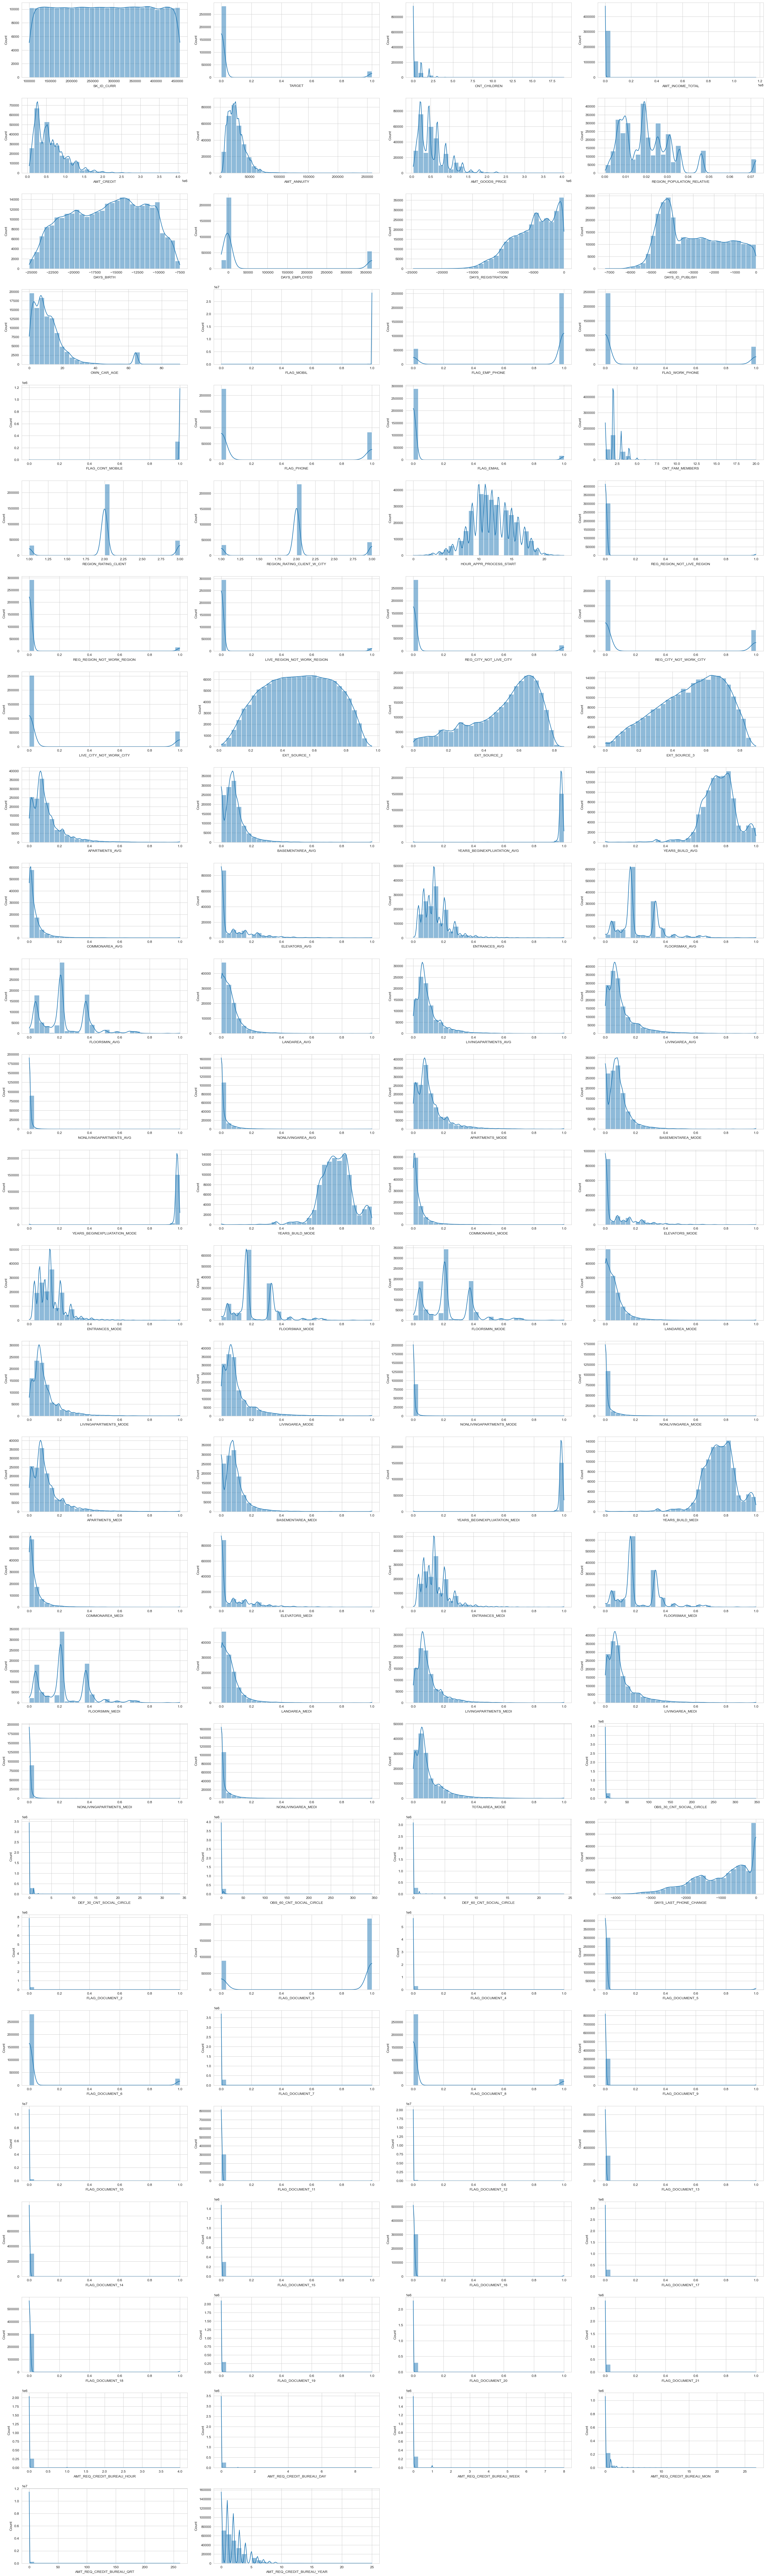

In [10]:
fc.distribution(df_datas_train_init, df_datas_train_init.select_dtypes(exclude=['object']).columns,
                n_cols=4, fig=(30,100))

**KDE :**

Nous allons désormais étudier les densités de certaines variables via un graphique KDE.
Un graphique d'estimation de la densité du noyau (KDE) est une méthode de visualisation de la distribution des observations dans un ensemble de données, analogue à un histogramme. KDE représente les données à l'aide d'une courbe de densité de probabilité continue dans une ou plusieurs dimensions.
Par rapport à un histogramme, KDE peut produire un tracé moins encombré et plus interprétable, en particulier lors du dessin de plusieurs distributions.

Text(0.5, 1.0, "Distribution des clients suivant l'âge")

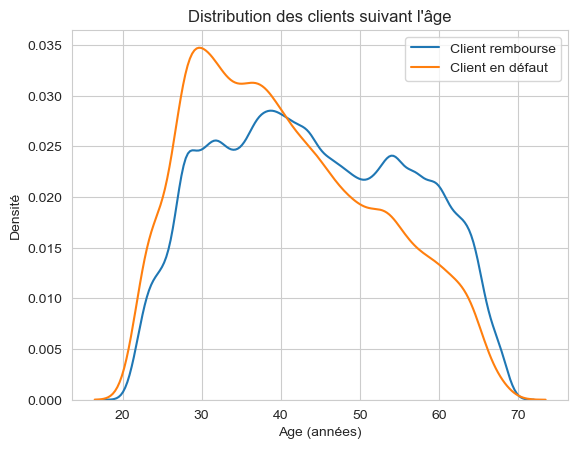

In [11]:
sns.kdeplot(df_datas_train.loc[df_datas_train['TARGET'] == 0, 'DAYS_BIRTH'], label = 'Client rembourse')
sns.kdeplot(df_datas_train.loc[df_datas_train['TARGET'] == 1, 'DAYS_BIRTH'], label = 'Client en défaut')

plt.xlabel('Age (années)')
plt.ylabel('Densité')
plt.legend()
plt.title("Distribution des clients suivant l'âge")

On peut constater ici que la courbe représentant les clients en défaut tend vers des âges plus jeunes, par rapport à la courbe représentant les clients qui remboursent. Cela pourrait signifier que les clients en défaut ont plus tendance à être jeunes.

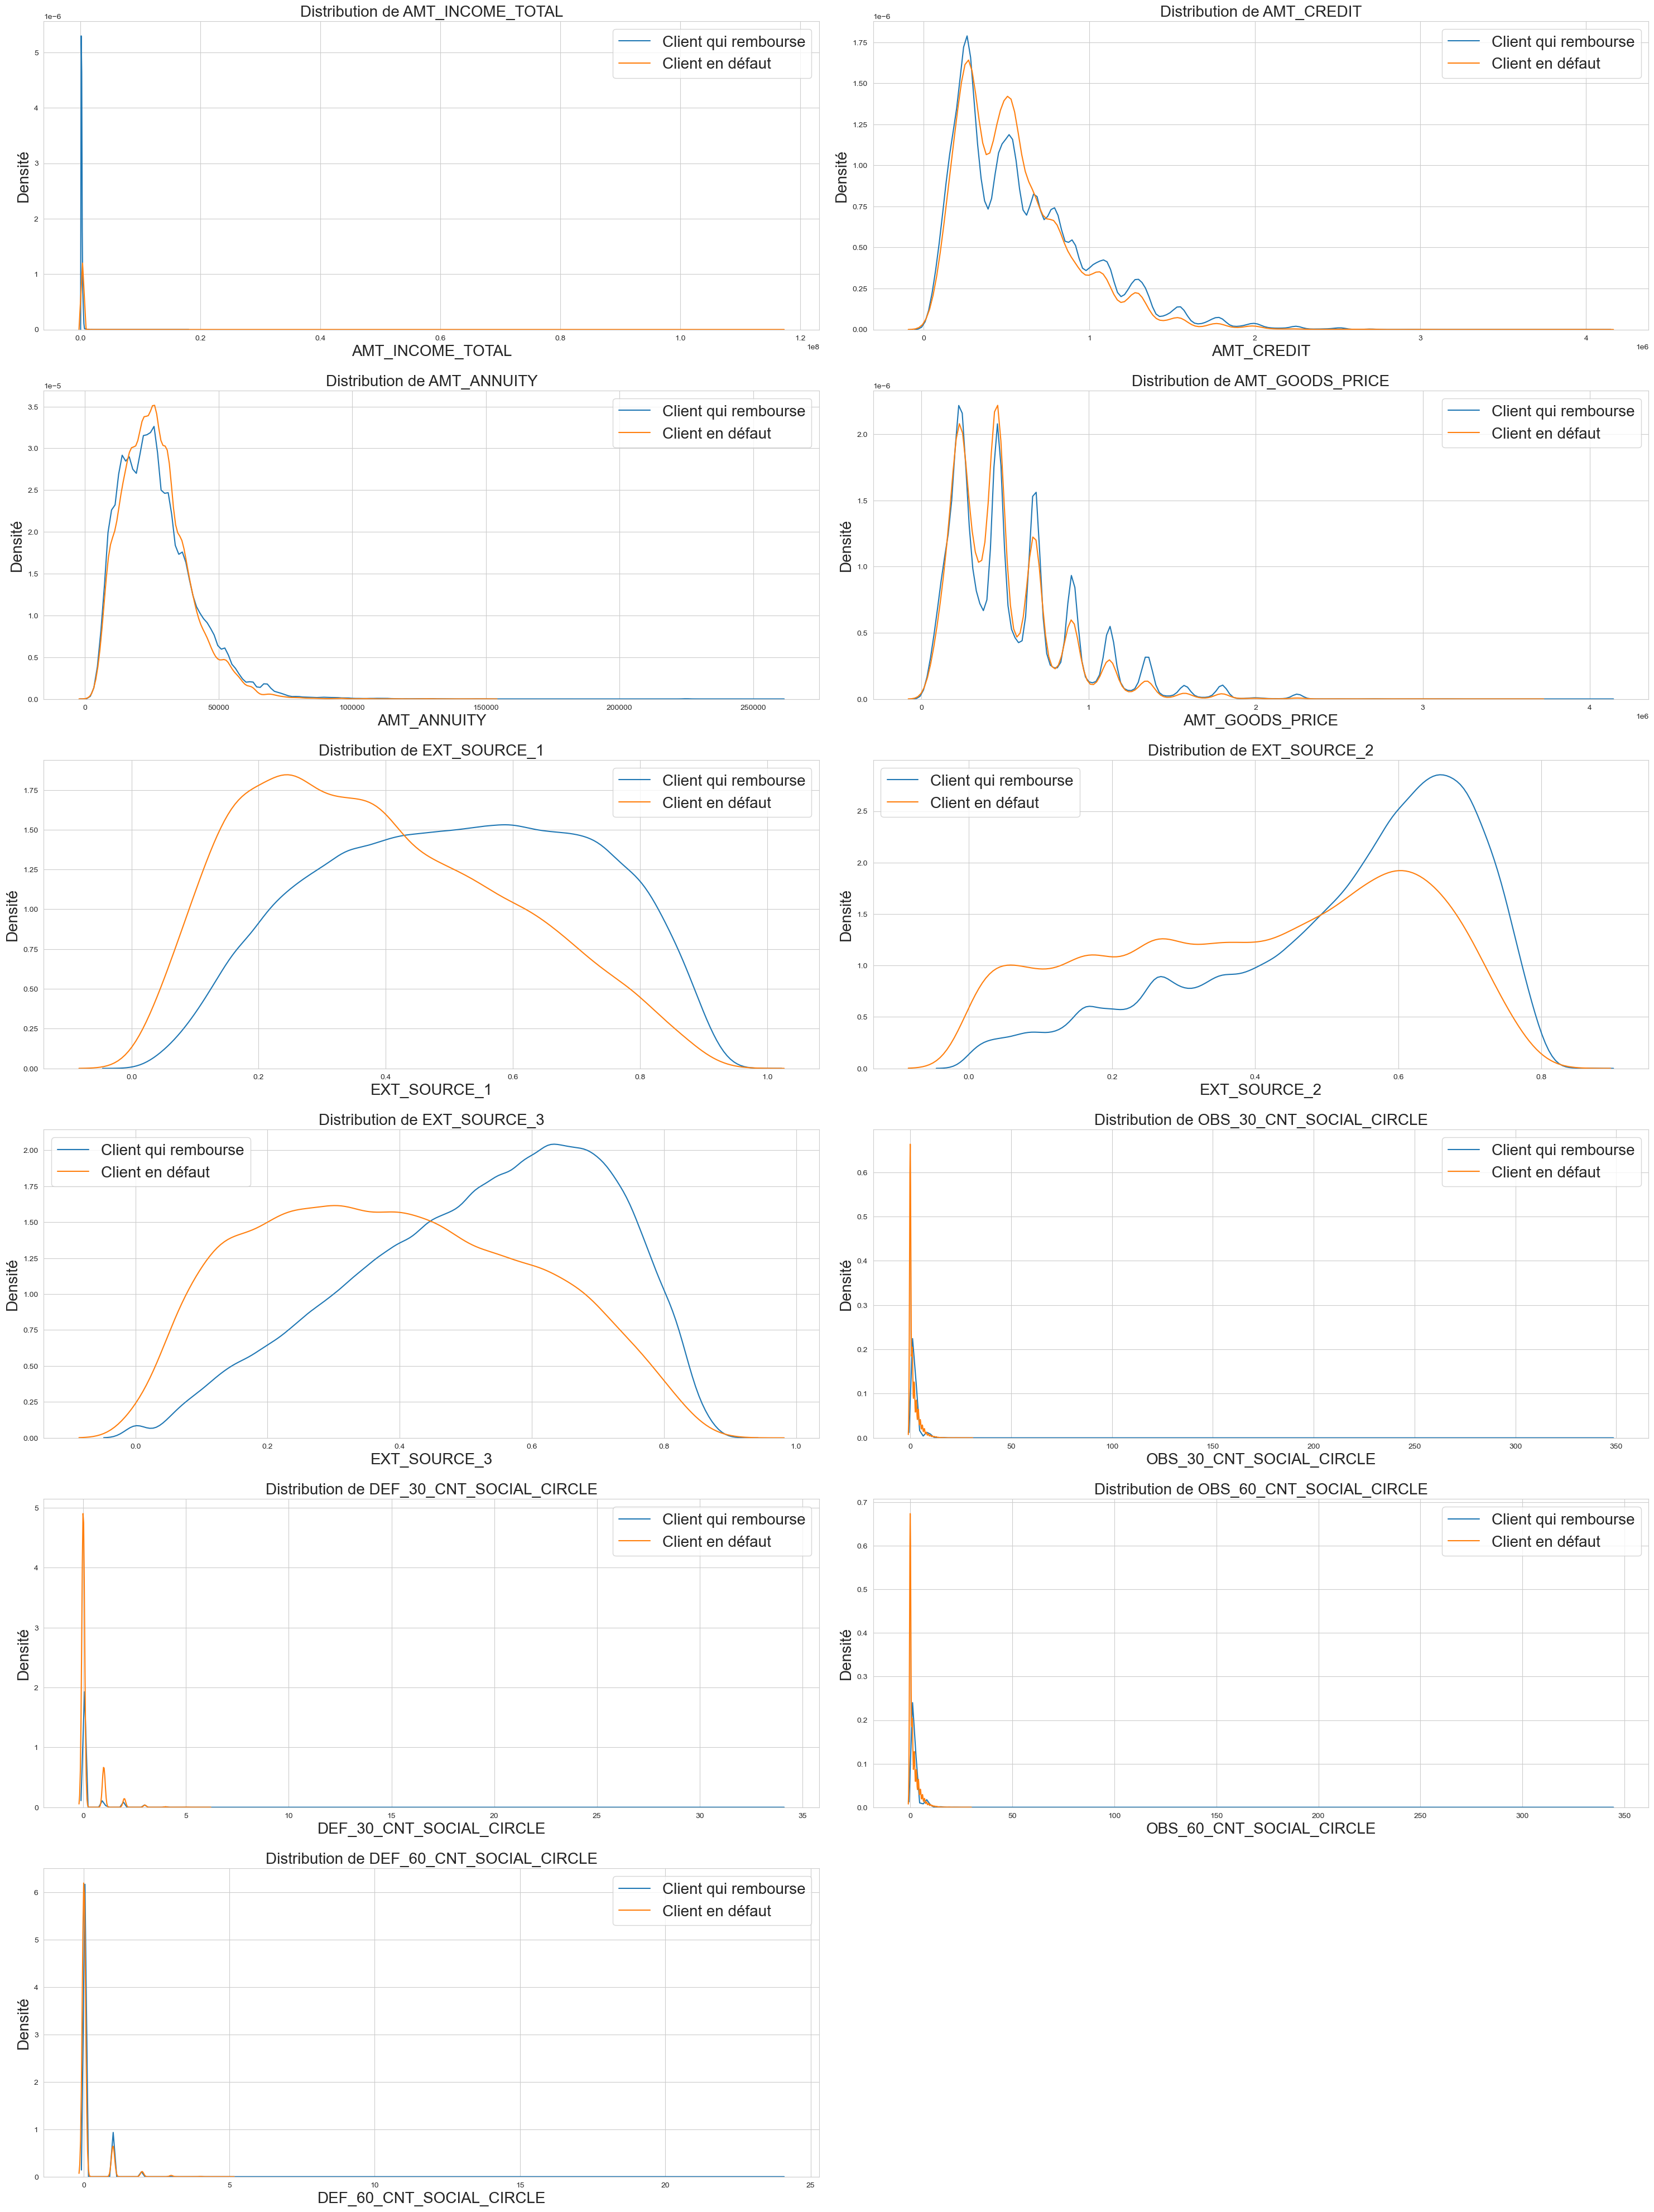

In [12]:
col_density = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
fc.distribution_densite(df_datas_train_init, col_density, n_cols=2, fig = (30,40))

On ne constate pas de grande différences entre les deux classes (*Client qui rembourse* ou *Client en défaut*) pour la plupart des features exceptées *'EXT_SOURCE_1'*, *'EXT_SOURCE_2'* et *'EXT_SOURCE_3'*. En effet, on peut constater que la classe représentant les clients en défaut semble être plus présente lorsque les valeurs pour ces features sont faibles, et inversement pour la seconde classe.

**Heatmap :**

In [13]:
col_quant = list(df_datas_train_init.select_dtypes(['float64']).columns)
col_quant.append('TARGET')

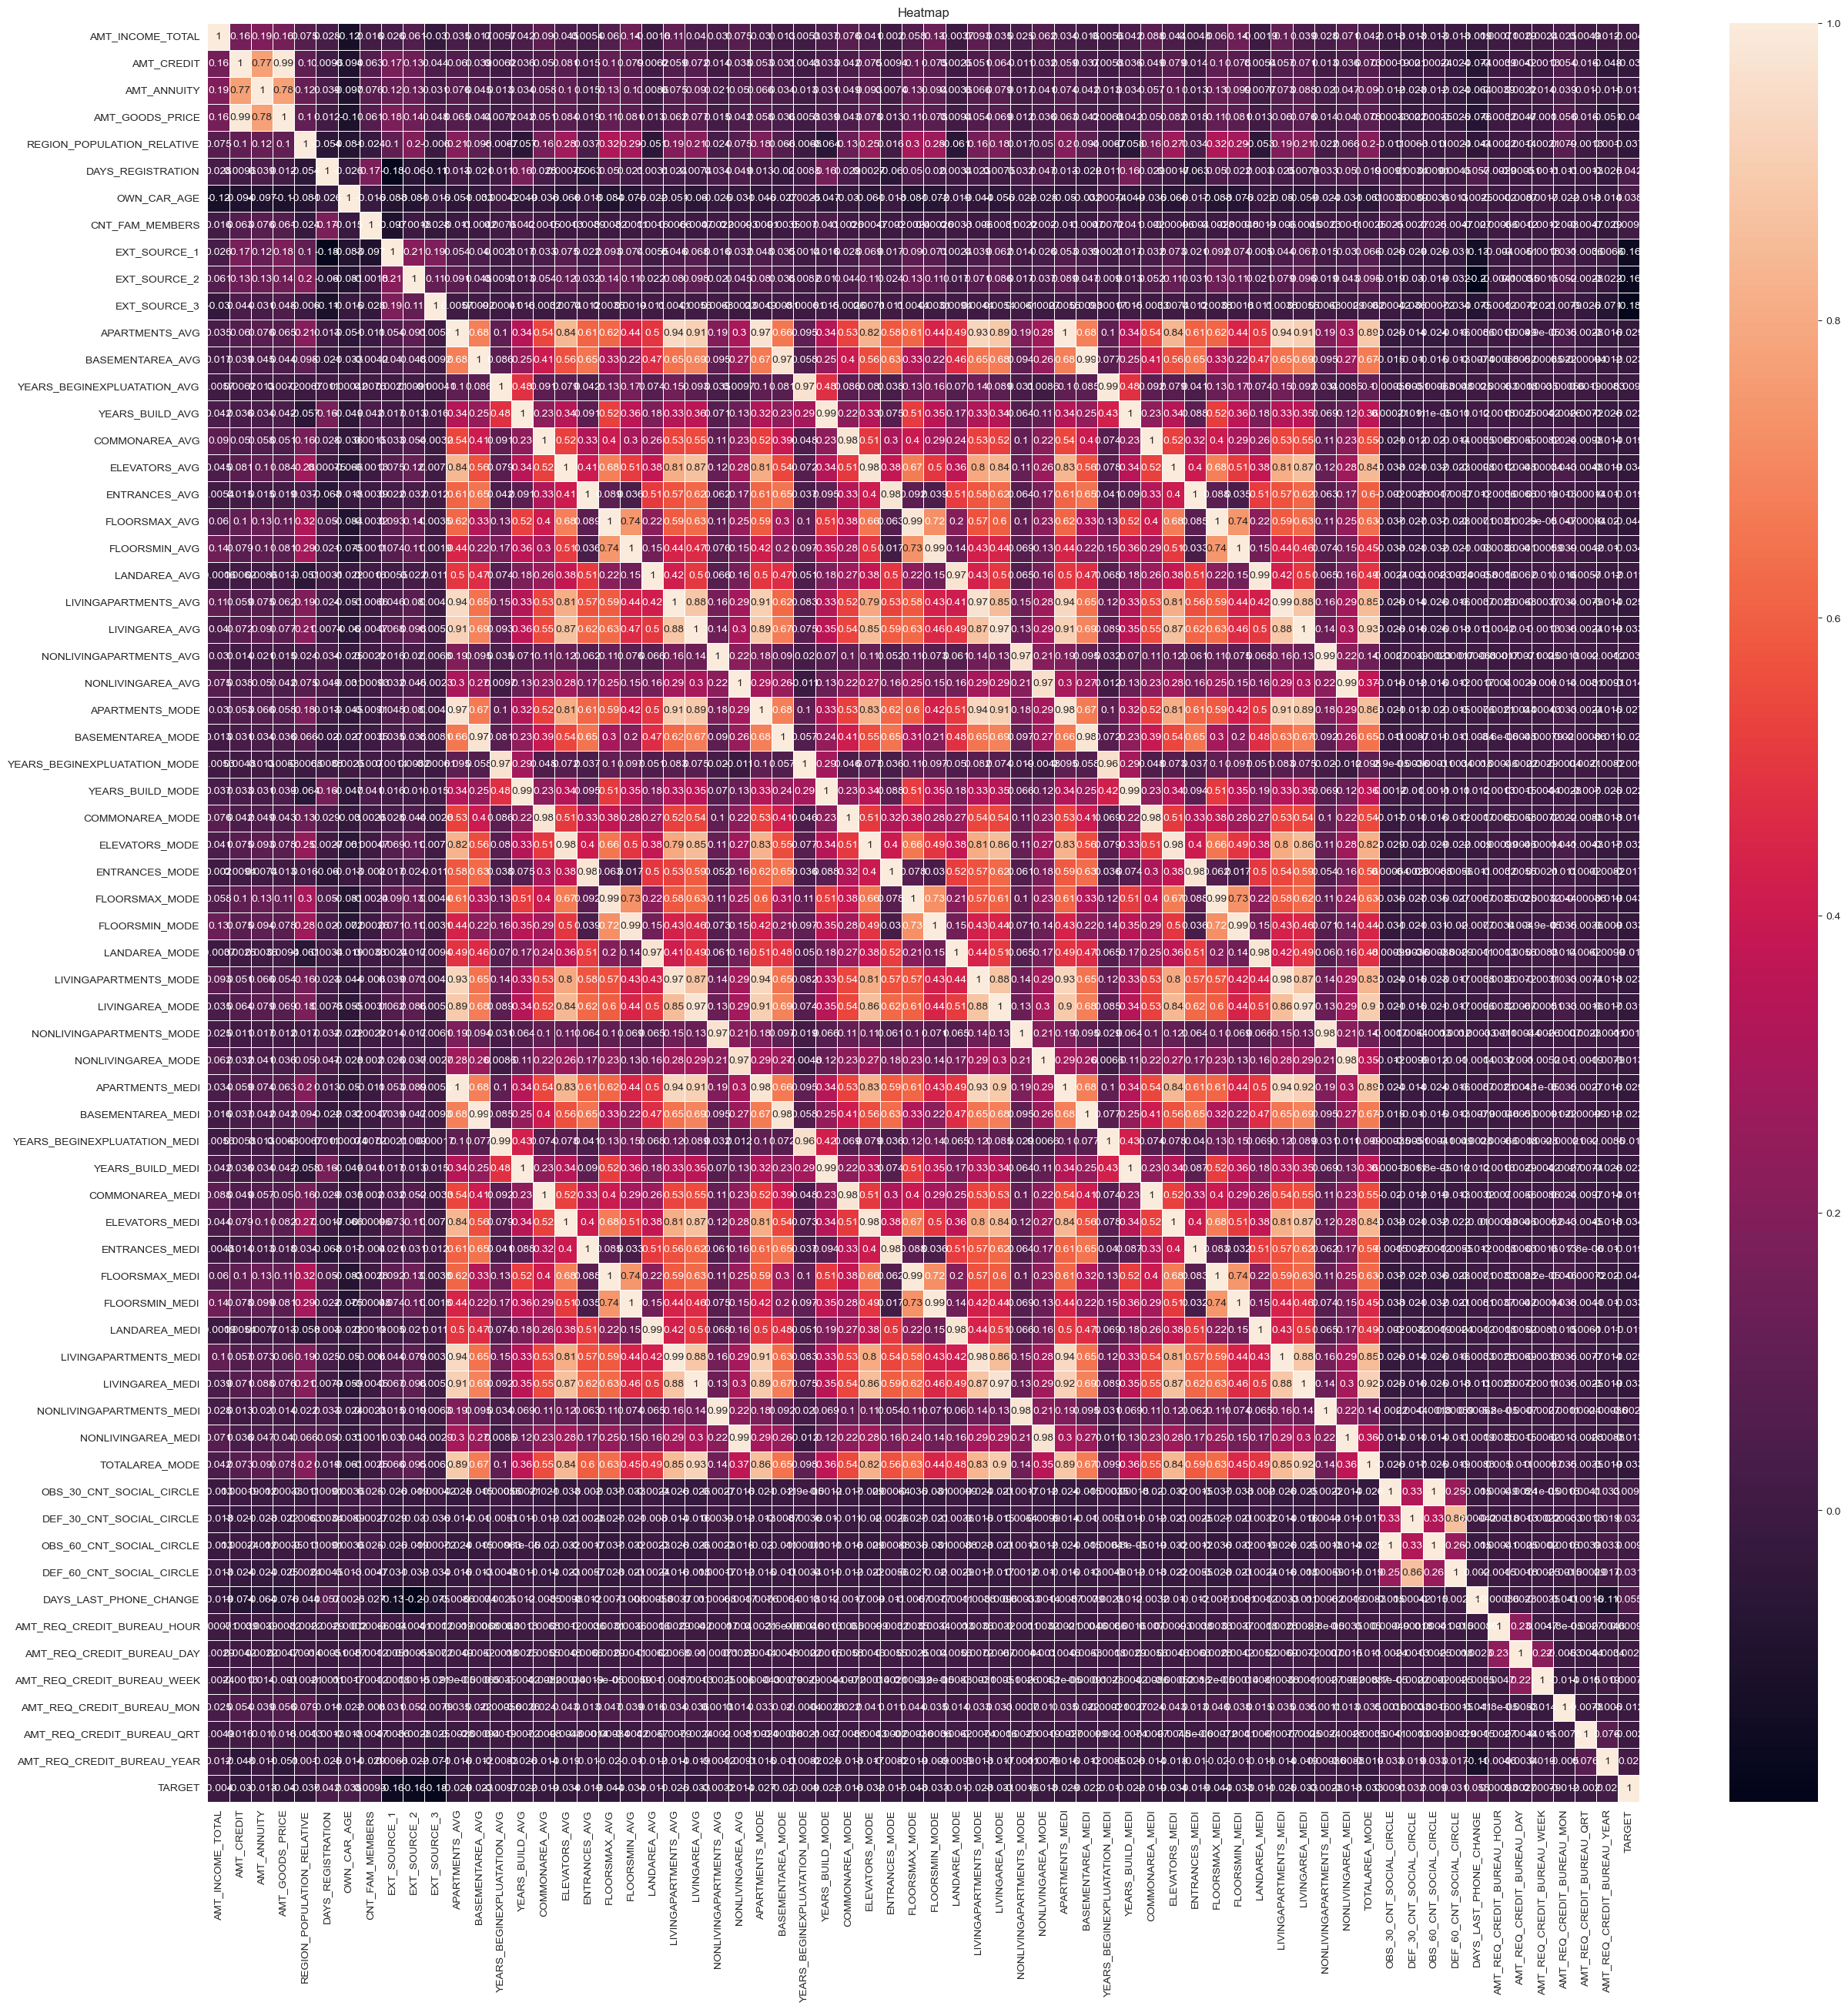

In [14]:
df_corr = df_datas_train_init[col_quant].corr()
fc.heat_map(df_corr)

**Boxplot :**

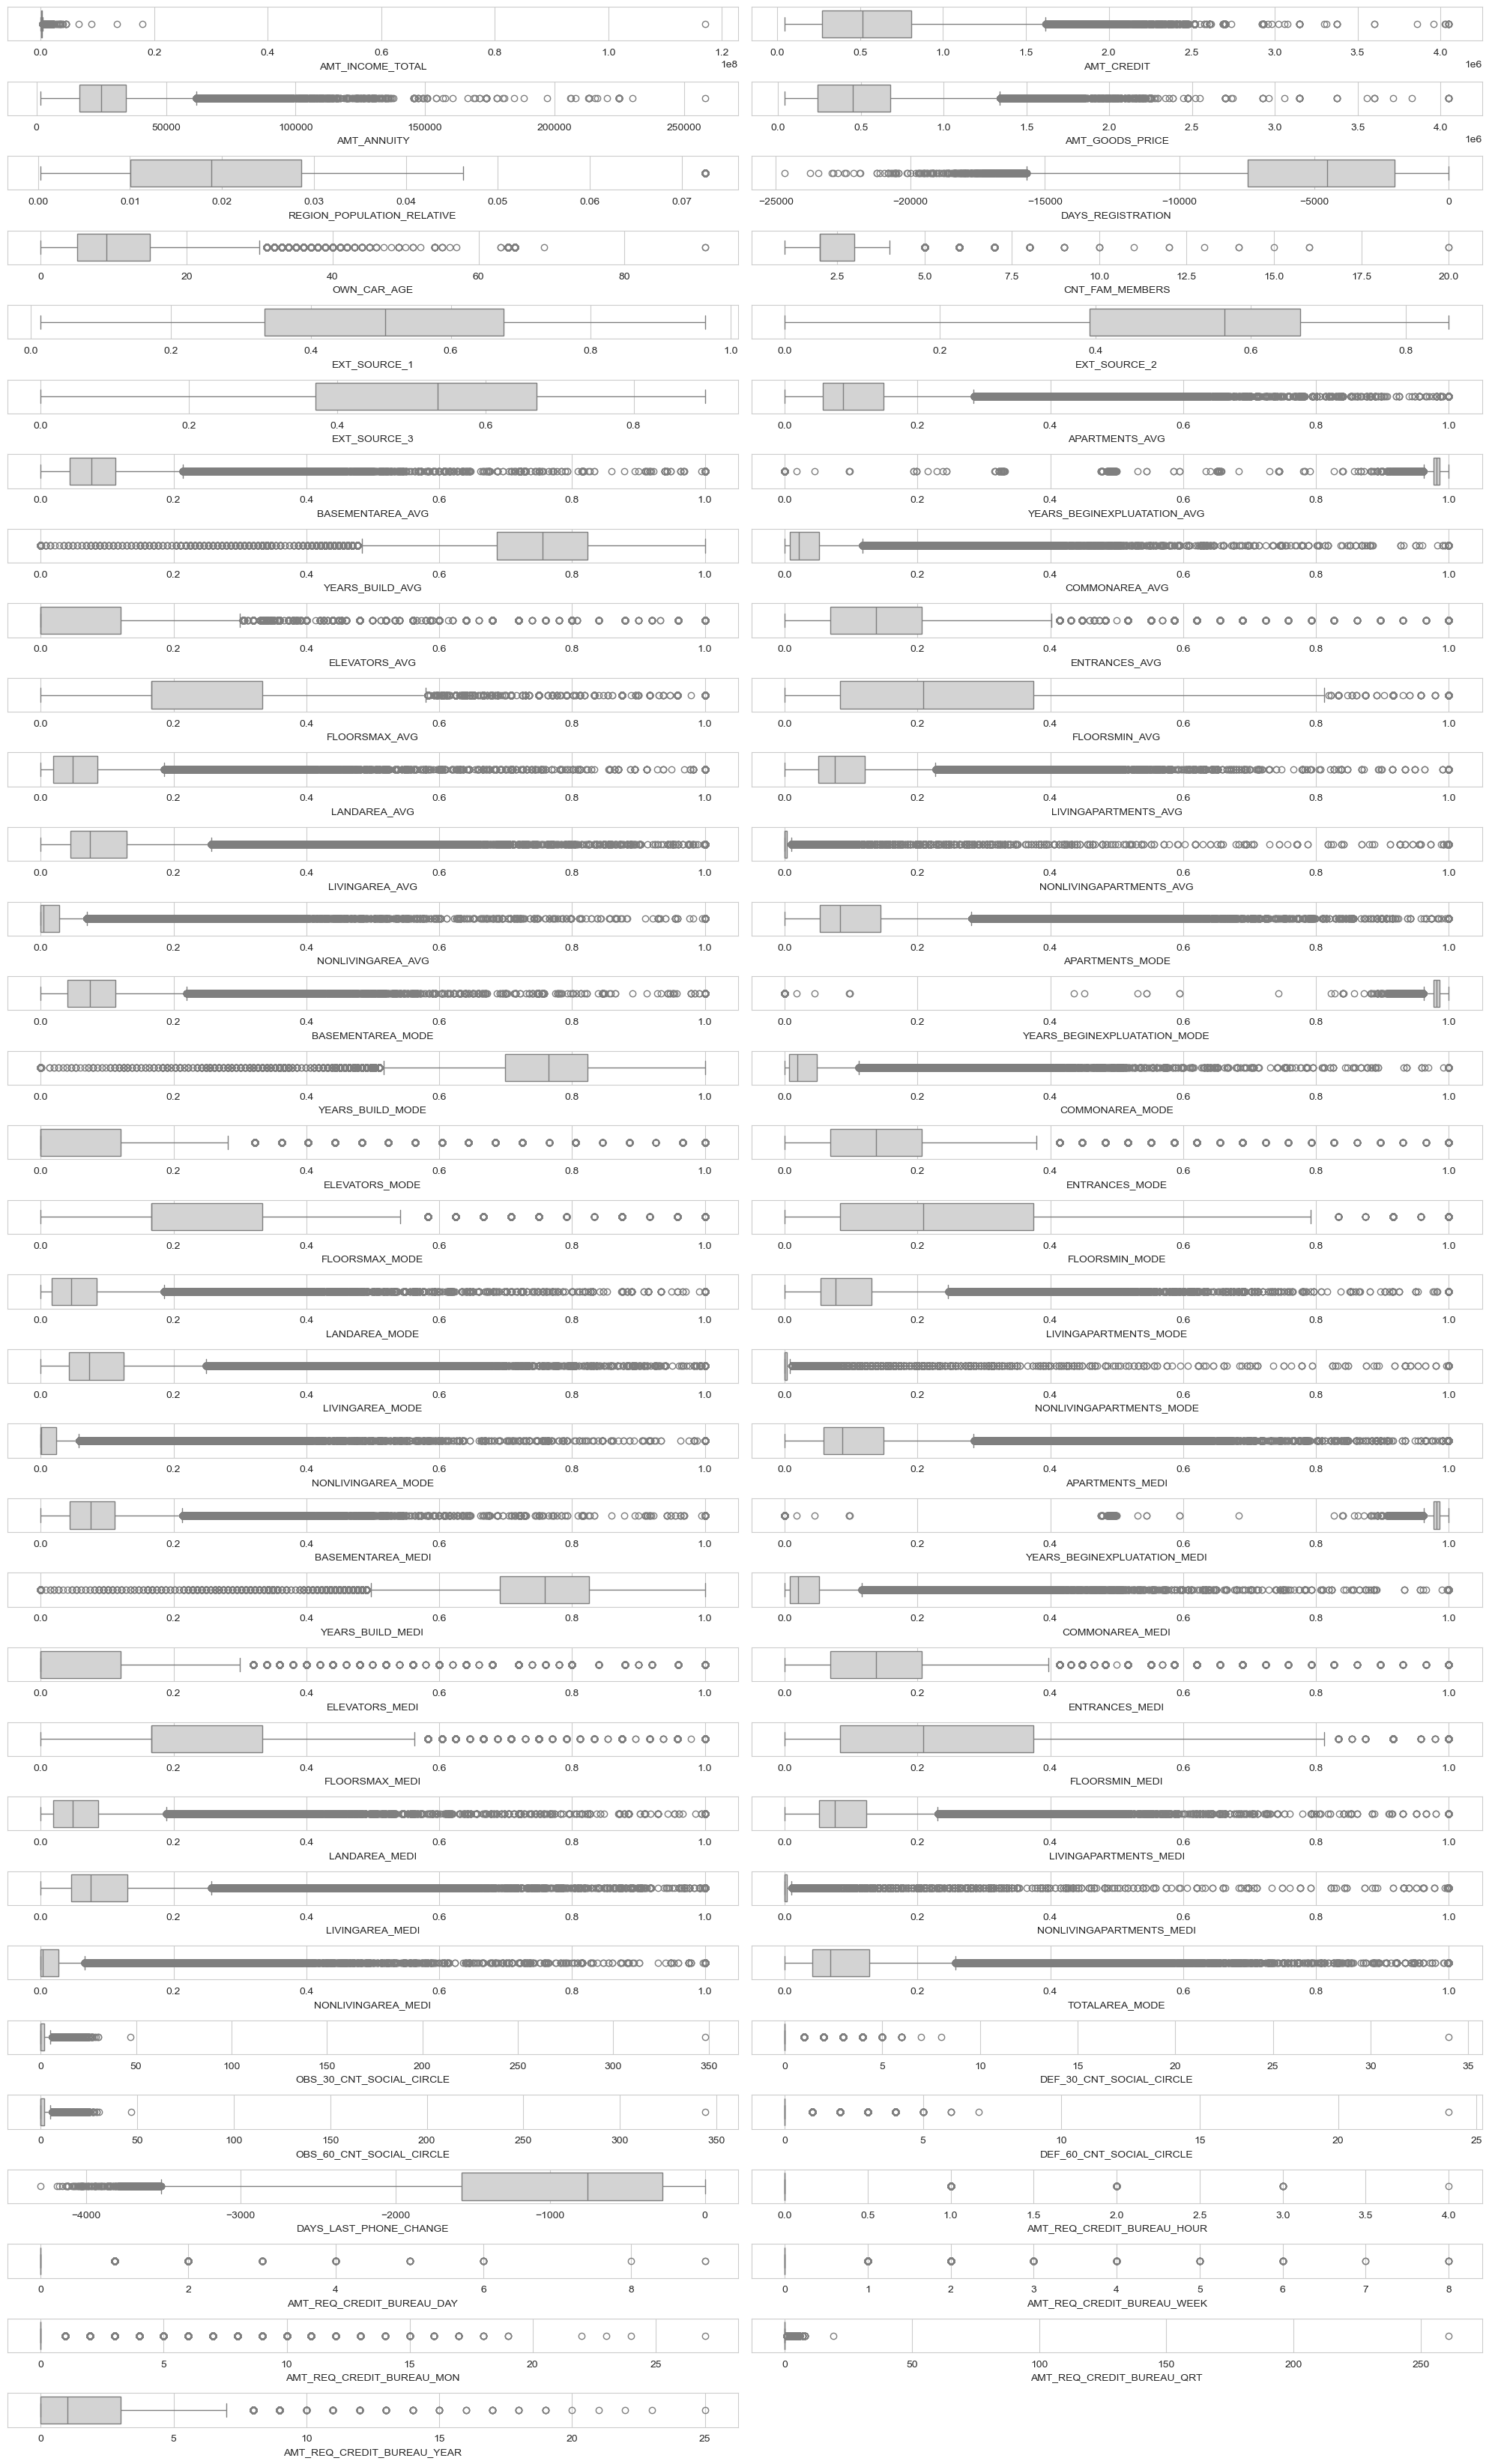

In [15]:
# Show outliers of each quantitative value
col_quant = list(df_datas_train_init.select_dtypes(['float64']).columns)
width = 20
height = ((len(col_quant) + 1) / 2) * 1

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(col_quant, 1):
    ax = fig.add_subplot((len(col_quant) + 2) // 2, 2, i)
    sns.boxplot(x=df_datas_train_init[c], orient='h',
                color='lightgrey', ax=ax)
    
fig.tight_layout()